[View in Colaboratory](https://colab.research.google.com/github/bajitkumar/fastai_in_colab/blob/master/Lesson1_fastai_v3.ipynb)

In [1]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/{accelerator}/torch_nightly.html
  
import torch
!pip install torchvision
!pip install fastai

#!pip install Pillow==5.3.0
#!pip install image

Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
    100% |████████████████████████████████| 575.6MB 28kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x61d80000 @  0x7f36fbd902a4 0x594e17 0x626104 0x51190a 0x4f5277 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x4f3338 0x510fb0 0x5119bd 0x4f6070
    100% |████████████████████████████████| 61kB 2.4MB/s 
    100% |████████████████████████████████| 519.5MB 28kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x58646000 @  0x7fb75aa142a4 0x594e17 0x626104 0x51190a 0x4f5277 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x4f3338 0x510fb0 0x5119bd 0x4f6070
    100% |████████████████████████████████| 2.0MB 3.9MB/s

In [2]:
!pip install Pillow==4.1.1
#!pip install PIL
!pip install image
#import PIL.image

    100% |████████████████████████████████| 5.7MB 6.1MB/s 
  Found existing installation: Pillow 5.3.0
    Uninstalling Pillow-5.3.0:
      Successfully uninstalled Pillow-5.3.0
    100% |████████████████████████████████| 7.3MB 5.5MB/s 


In [3]:
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.backends.cudnn.enabled)

1.0.0.dev20181022
True
True


In [0]:
%matplotlib inline

In [0]:
import fastai
from fastai import *
from fastai.vision import *

In [6]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [7]:
path.ls()

['images', 'annotations']

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [9]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/samoyed_1.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_83.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_16.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Persian_32.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Siamese_122.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=10)
data.normalize(imagenet_stats)

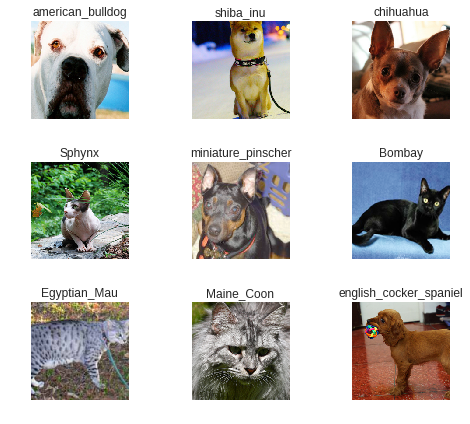

In [12]:
data.show_batch(rows=3, figsize=(7,6))

In [13]:
print(data.classes)
len(data.classes),data.c

['samoyed', 'Ragdoll', 'yorkshire_terrier', 'Persian', 'Siamese', 'beagle', 'Abyssinian', 'english_setter', 'chihuahua', 'english_cocker_spaniel', 'japanese_chin', 'Birman', 'newfoundland', 'Russian_Blue', 'basset_hound', 'shiba_inu', 'havanese', 'pug', 'american_pit_bull_terrier', 'Egyptian_Mau', 'wheaten_terrier', 'Bengal', 'British_Shorthair', 'leonberger', 'staffordshire_bull_terrier', 'Maine_Coon', 'saint_bernard', 'Sphynx', 'keeshond', 'german_shorthaired', 'boxer', 'american_bulldog', 'pomeranian', 'scottish_terrier', 'miniature_pinscher', 'great_pyrenees', 'Bombay']


(37, 37)

In [14]:
learn = ConvLearner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 49674583.87it/s]


In [15]:
learn.fit_one_cycle(5)

epoch  train_loss  valid_loss  error_rate
1      0.751587    0.335329    0.109115  
2      0.717945    0.305084    0.099135  
3      0.641468    0.247693    0.077844  
4      0.432677    0.221632    0.073852  
5      0.405355    0.208060    0.070526  


In [16]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         359G   14G  327G   4% /
tmpfs           6.4G     0  6.4G   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
tmpfs           6.4G  8.0K  6.4G   1% /var/colab
/dev/sda1       365G   18G  348G   5% /opt/bin
shm              64M  4.0K   64M   1% /dev/shm
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

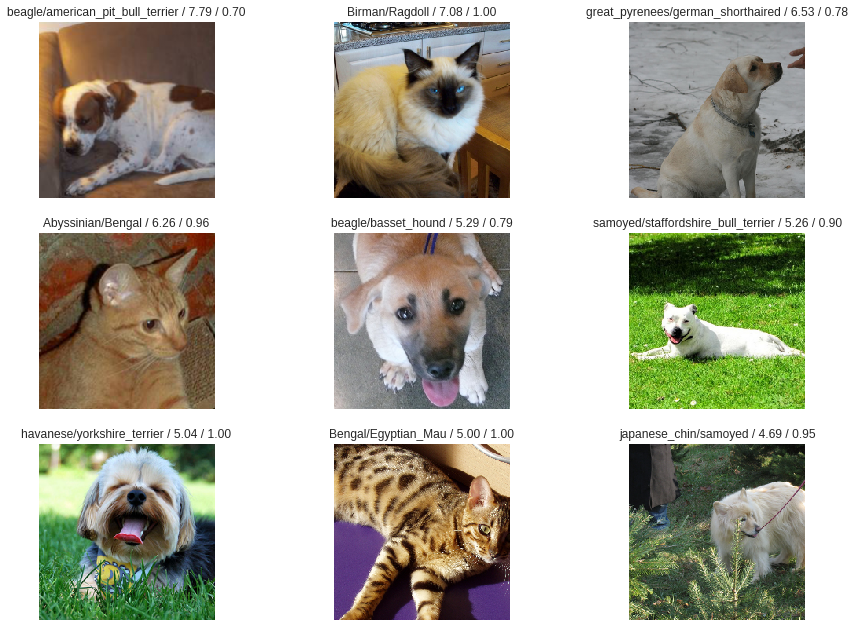

In [19]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
doc(interp.plot_top_losses)

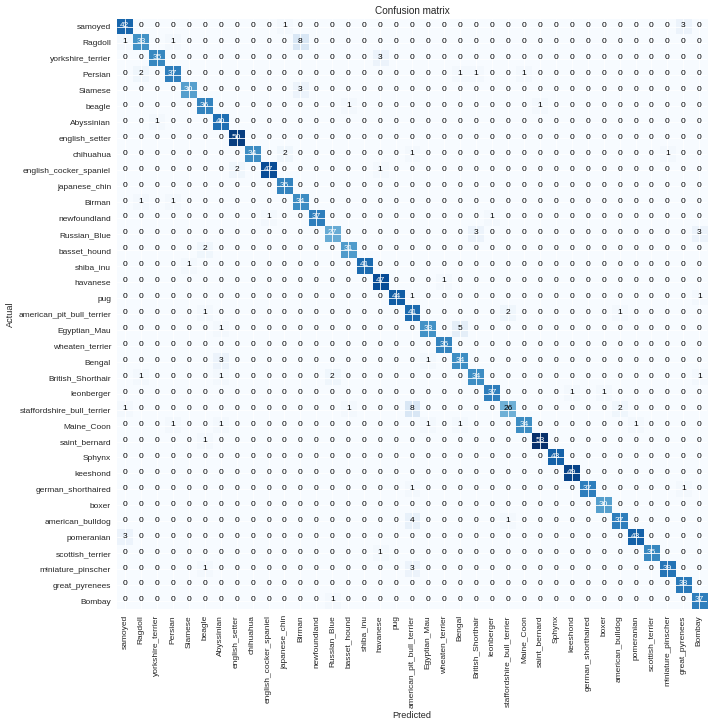

In [21]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [22]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 8),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 8),
 ('Egyptian_Mau', 'Bengal', 5),
 ('american_bulldog', 'american_pit_bull_terrier', 4),
 ('samoyed', 'great_pyrenees', 3),
 ('yorkshire_terrier', 'havanese', 3),
 ('Siamese', 'Birman', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('Russian_Blue', 'Bombay', 3),
 ('Bengal', 'Abyssinian', 3),
 ('pomeranian', 'samoyed', 3),
 ('miniature_pinscher', 'american_pit_bull_terrier', 3)]